In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
employee_ids = [f"E{str(i).zfill(3)}" for i in range(1, 31)]
dates = pd.date_range(start="2025-06-01", periods=30)
data = []

for emp_id in employee_ids:
    for date in dates:
        hours = round(np.random.uniform(4, 10), 2)
        if random.random() < 0.02:
            hours = round(np.random.uniform(0, 2), 2)  
        elif random.random() < 0.02:
            hours = round(np.random.uniform(12, 15), 2)  
        data.append([emp_id, date, hours])

df = pd.DataFrame(data, columns=["EmployeeID", "Date", "WorkingHours"])
df.head()

,EmployeeID,Date,WorkingHours
0,E001,2025-06-01,4.84
1,E001,2025-06-02,6.12
2,E001,2025-06-03,8.37
3,E001,2025-06-04,9.38
4,E001,2025-06-05,9.71


In [3]:
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nWorking Hours Stats:\n", df["WorkingHours"].describe())

Data shape: (900, 3)

Data types:
 EmployeeID              object
Date            datetime64[ns]
WorkingHours           float64
dtype: object

Missing values:
 EmployeeID      0
Date            0
WorkingHours    0
dtype: int64

Working Hours Stats:
 count    900.000000
mean       6.949900
std        2.141522
min        0.140000
25%        5.387500
50%        6.920000
75%        8.475000
max       14.760000
Name: WorkingHours, dtype: float64


In [4]:
employee_summary = df.groupby("EmployeeID")["WorkingHours"].agg(["sum", "mean", "min", "max"]).reset_index()
employee_summary.columns = ["EmployeeID", "TotalHours", "AverageHours", "MinHours", "MaxHours"]
employee_summary.sort_values("TotalHours", ascending=False).head()

,EmployeeID,TotalHours,AverageHours,MinHours,MaxHours
16,E017,230.40,7.680000,4.12,14.76
19,E020,220.86,7.362000,4.03,12.61
15,E016,220.71,7.357000,4.44,13.52
4,E005,218.47,7.282333,0.55,13.99
9,E010,218.12,7.270667,4.16,13.61


In [5]:
low_threshold = 4
high_threshold = 10
anomalies = df[(df["WorkingHours"] < low_threshold) | (df["WorkingHours"] > high_threshold)]
print(f"Total anomalies detected: {len(anomalies)}")
anomalies.sample(5)

Total anomalies detected: 39


,EmployeeID,Date,WorkingHours
19,E001,2025-06-20,0.14
718,E024,2025-06-29,0.54
493,E017,2025-06-14,14.76
85,E003,2025-06-26,0.21
833,E028,2025-06-24,1.06


/tmp/ipykernel_8085/2676776064.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=employee_summary.sort_values("TotalHours", ascending=False), x="EmployeeID", y="TotalHours", palette="viridis")


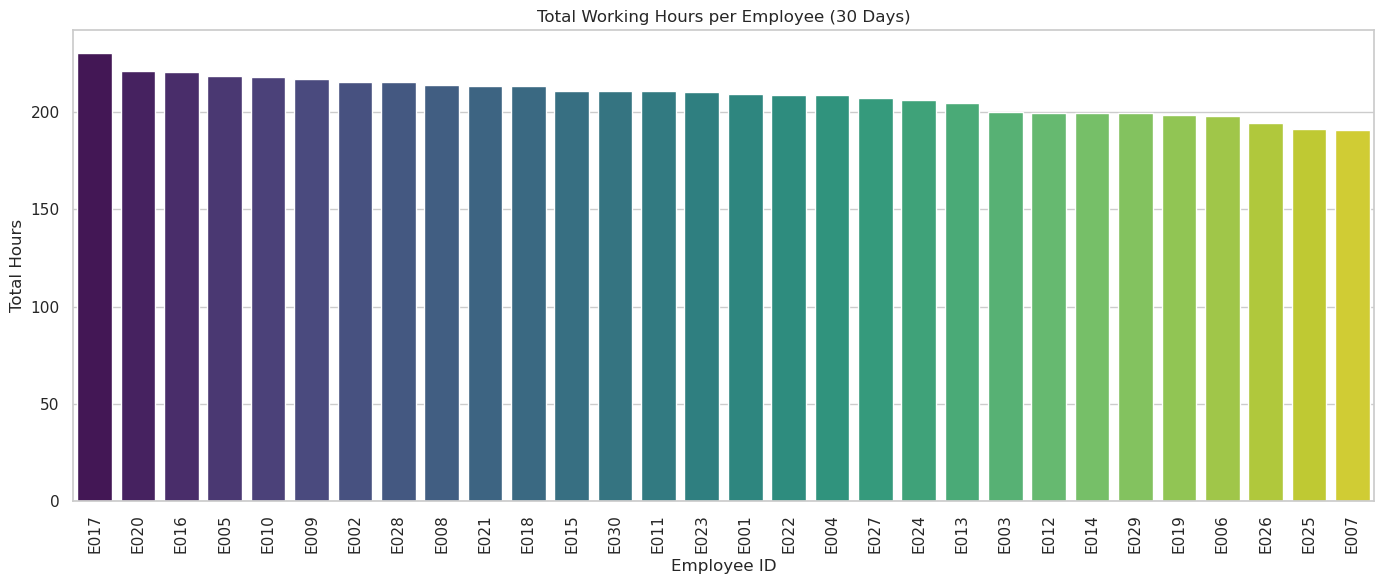

In [6]:
plt.figure(figsize=(14, 6))
sns.barplot(data=employee_summary.sort_values("TotalHours", ascending=False), x="EmployeeID", y="TotalHours", palette="viridis")
plt.title("Total Working Hours per Employee (30 Days)")
plt.xticks(rotation=90)
plt.ylabel("Total Hours")
plt.xlabel("Employee ID")
plt.tight_layout()
plt.show()

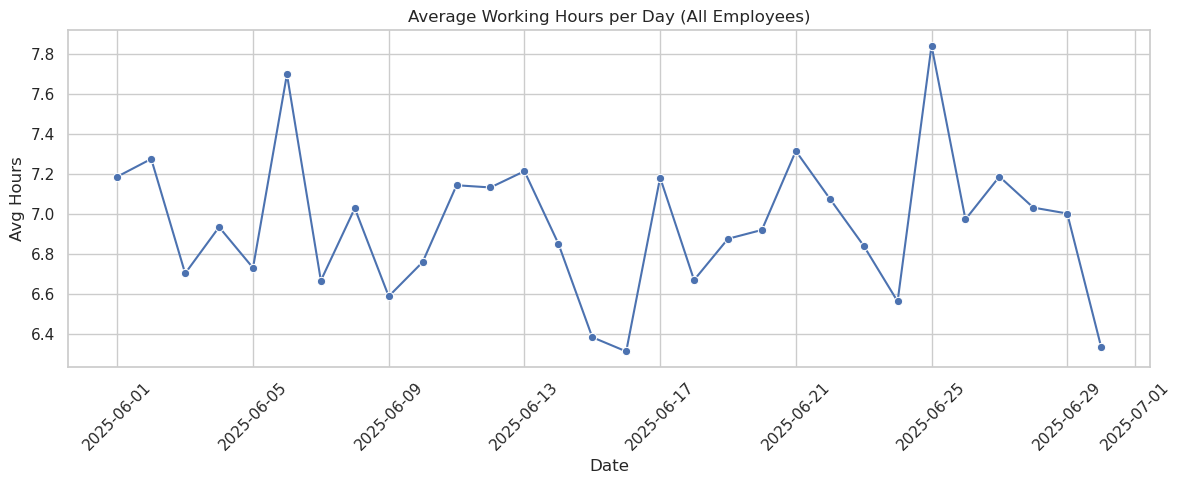

In [9]:
daily_avg = df.groupby("Date")["WorkingHours"].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_avg, x="Date", y="WorkingHours", marker="o")
plt.title("Average Working Hours per Day (All Employees)")
plt.ylabel("Avg Hours")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

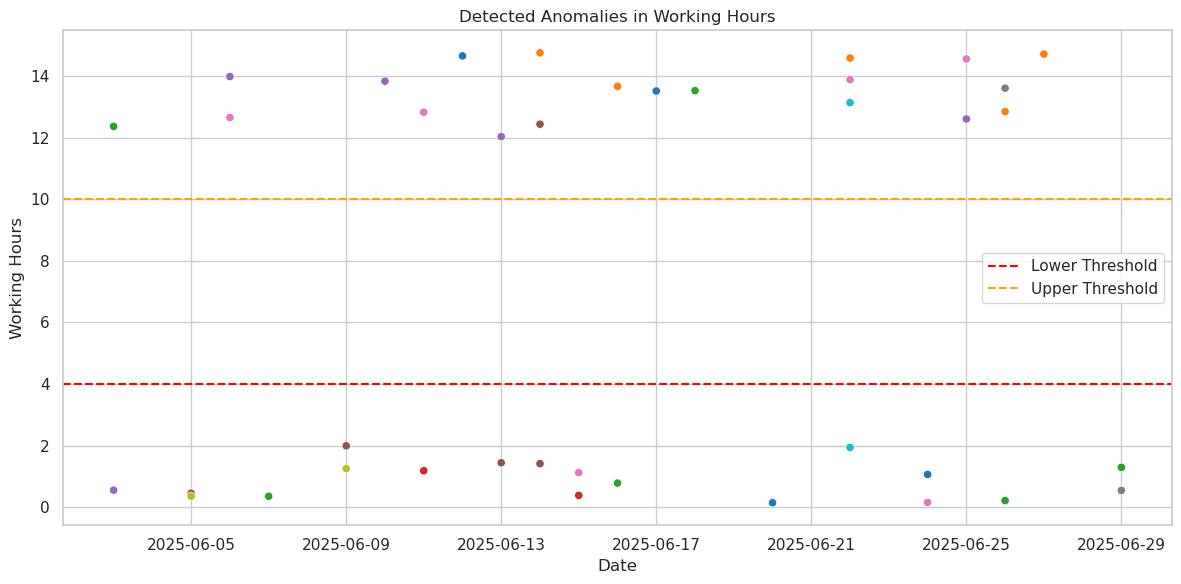

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=anomalies, x="Date", y="WorkingHours", hue="EmployeeID", palette="tab10", legend=False)
plt.title("Detected Anomalies in Working Hours")
plt.axhline(y=low_threshold, color='red', linestyle='--', label="Lower Threshold")
plt.axhline(y=high_threshold, color='orange', linestyle='--', label="Upper Threshold")
plt.ylabel("Working Hours")
plt.legend()
plt.tight_layout()
plt.show()